## Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas.core.api import notnull
import warnings


import MySQLdb
import csv
from pandas.io import sql
from sqlalchemy import create_engine
import pymysql

warnings.filterwarnings('ignore')


In [2]:
food_df = pd.read_csv('en.openfoodfacts.org.products.csv',sep='\t')

In [6]:
food_df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,is_us
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,NaN,...,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


## Filter data to only US food

In [7]:
us_food = food_df[food_df['countries_en'].str.contains('United States', na=False)]

In [8]:
print(f"Total number of US food items: {len(us_food)}")
us_food.head()

Total number of US food items: 349161


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,is_us
55,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
56,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
113,0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1545997008,2018-12-28T11:36:48Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
114,0000000016094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1545997008,2018-12-28T11:36:48Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
115,0000000016100,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [ ]:
## Analyze nutrition information missing values

In [12]:
# Get all nutrition columns (ending with _100g)
nutrition_cols = [col for col in us_food.columns if col.endswith('_100g')]

# Calculate percentage of missing values for each nutrition column
missing_percentages = (us_food[nutrition_cols].isnull().sum() / len(us_food) * 100).sort_values(ascending=True)

# Create a figure with larger size
plt.figure(figsize=(15, 8))

# Print the exact percentages
print("\nPercentage of missing values for each nutrition column:")
for col, percentage in missing_percentages.items():
    print(f"{col}: {percentage:.2f}%")


Percentage of missing values for each nutrition column:
fat_100g: 5.08%
carbohydrates_100g: 5.18%
proteins_100g: 5.20%
energy_100g: 5.21%
energy-kcal_100g: 5.28%
salt_100g: 6.14%
sodium_100g: 6.14%
sugars_100g: 9.93%
saturated-fat_100g: 16.80%
cholesterol_100g: 23.81%
fiber_100g: 24.06%
trans-fat_100g: 24.92%
iron_100g: 25.69%
calcium_100g: 25.91%
nutrition-score-fr_100g: 31.45%
vitamin-c_100g: 38.43%
vitamin-a_100g: 40.20%
potassium_100g: 74.43%
monounsaturated-fat_100g: 87.86%
polyunsaturated-fat_100g: 87.87%
vitamin-pp_100g: 93.99%
vitamin-b1_100g: 94.21%
vitamin-b2_100g: 94.35%
vitamin-b6_100g: 96.32%
phosphorus_100g: 96.71%
magnesium_100g: 96.82%
vitamin-b12_100g: 97.23%
zinc_100g: 97.52%
folates_100g: 97.60%
vitamin-b9_100g: 97.79%
vitamin-d_100g: 98.17%
pantothenic-acid_100g: 98.75%
copper_100g: 98.91%
-soluble-fiber_100g: 98.97%
manganese_100g: 99.00%
-insoluble-fiber_100g: 99.05%
polyols_100g: 99.27%
selenium_100g: 99.43%
phylloquinone_100g: 99.51%
iodine_100g: 99.63%
energy-

<Figure size 1500x800 with 0 Axes>

In [13]:
# Get columns with less than 50% missing values
usable_columns = missing_percentages[missing_percentages < 50].index.tolist()
print("\nNutrition columns with less than 50% missing values:")
for col in usable_columns:
    print(f"{col}: {missing_percentages[col]:.2f}% missing")

# Get columns with more than 90% missing values
highly_missing = missing_percentages[missing_percentages > 90].index.tolist()
print("\nNutrition columns with more than 90% missing values (consider dropping these):")
for col in highly_missing:
    print(f"{col}: {missing_percentages[col]:.2f}% missing")


Nutrition columns with less than 50% missing values:
fat_100g: 5.08% missing
carbohydrates_100g: 5.18% missing
proteins_100g: 5.20% missing
energy_100g: 5.21% missing
energy-kcal_100g: 5.28% missing
salt_100g: 6.14% missing
sodium_100g: 6.14% missing
sugars_100g: 9.93% missing
saturated-fat_100g: 16.80% missing
cholesterol_100g: 23.81% missing
fiber_100g: 24.06% missing
trans-fat_100g: 24.92% missing
iron_100g: 25.69% missing
calcium_100g: 25.91% missing
nutrition-score-fr_100g: 31.45% missing
vitamin-c_100g: 38.43% missing
vitamin-a_100g: 40.20% missing

Nutrition columns with more than 90% missing values (consider dropping these):
vitamin-pp_100g: 93.99% missing
vitamin-b1_100g: 94.21% missing
vitamin-b2_100g: 94.35% missing
vitamin-b6_100g: 96.32% missing
phosphorus_100g: 96.71% missing
magnesium_100g: 96.82% missing
vitamin-b12_100g: 97.23% missing
zinc_100g: 97.52% missing
folates_100g: 97.60% missing
vitamin-b9_100g: 97.79% missing
vitamin-d_100g: 98.17% missing
pantothenic-acid

## Create cleaned nutrition dataframe

In [25]:
# Create a list of basic columns we want to keep (non-nutrition columns)
basic_cols = ['code', 'image_url', 'product_name', 'generic_name', 'brands', 'categories', 'pnns_groups_1', 'nutriscore_score']

# Create the cleaned dataframe with basic columns and usable nutrition columns
cleaned_us_food = us_food[basic_cols + usable_columns].copy()
print("Shape of cleaned dataframe:", cleaned_us_food.shape)
print("\nColumns in cleaned dataframe:")
for col in cleaned_us_food.columns:
    print(f"- {col}")

Shape of cleaned dataframe: (349161, 25)

Columns in cleaned dataframe:
- code
- image_url
- product_name
- generic_name
- brands
- categories
- pnns_groups_1
- nutriscore_score
- fat_100g
- carbohydrates_100g
- proteins_100g
- energy_100g
- energy-kcal_100g
- salt_100g
- sodium_100g
- sugars_100g
- saturated-fat_100g
- cholesterol_100g
- fiber_100g
- trans-fat_100g
- iron_100g
- calcium_100g
- nutrition-score-fr_100g
- vitamin-c_100g
- vitamin-a_100g


In [26]:
cleaned_us_food.head()

,code,image_url,product_name,generic_name,brands,categories,pnns_groups_1,nutriscore_score,fat_100g,carbohydrates_100g,...,sugars_100g,saturated-fat_100g,cholesterol_100g,fiber_100g,trans-fat_100g,iron_100g,calcium_100g,nutrition-score-fr_100g,vitamin-c_100g,vitamin-a_100g
55,0000000004530,NaN,Banana Chips Sweetened (Whole),NaN,NaN,NaN,unknown,NaN,28.57,64.29,...,14.29,28.57,0.018,3.6,0.0,0.00129,0.000,NaN,0.0214,0.0
56,0000000004559,NaN,Peanuts,NaN,Torn & Glasser,NaN,unknown,NaN,17.86,60.71,...,17.86,0.00,0.000,7.1,0.0,0.00129,0.071,NaN,0.0000,0.0
113,0000000016087,NaN,Organic Salted Nut Mix,NaN,Grizzlies,NaN,unknown,NaN,57.14,17.86,...,3.57,5.36,NaN,7.1,NaN,0.00514,0.143,NaN,NaN,NaN
114,0000000016094,NaN,Organic Polenta,NaN,Bob's Red Mill,NaN,unknown,NaN,1.43,77.14,...,NaN,NaN,NaN,5.7,NaN,NaN,NaN,NaN,NaN,NaN
115,0000000016100,NaN,Breadshop Honey Gone Nuts Granola,NaN,Unfi,NaN,unknown,NaN,18.27,63.46,...,11.54,1.92,NaN,7.7,NaN,0.00346,0.038,NaN,NaN,NaN


## Analyze nutrition columns distribution

Distribution analysis for each nutrition column:
                    fat_100g  carbohydrates_100g  proteins_100g  energy_100g  \
mean                   12.20               33.44           7.07      1119.45   
median                  4.79               23.44           4.30      1117.00   
skewness                6.44                6.77          75.31        42.62   
missing_percentage      5.08                5.18           5.20         5.21   

                    energy-kcal_100g  salt_100g  sodium_100g  sugars_100g  \
mean                          267.68       2.98         1.19        16.44   
median                        267.00       0.62         0.25         6.35   
skewness                       42.70     329.20       329.41         1.75   
missing_percentage              5.28       6.14         6.14         9.93   

                    saturated-fat_100g  cholesterol_100g  fiber_100g  \
mean                              4.75              0.04        2.85   
median              

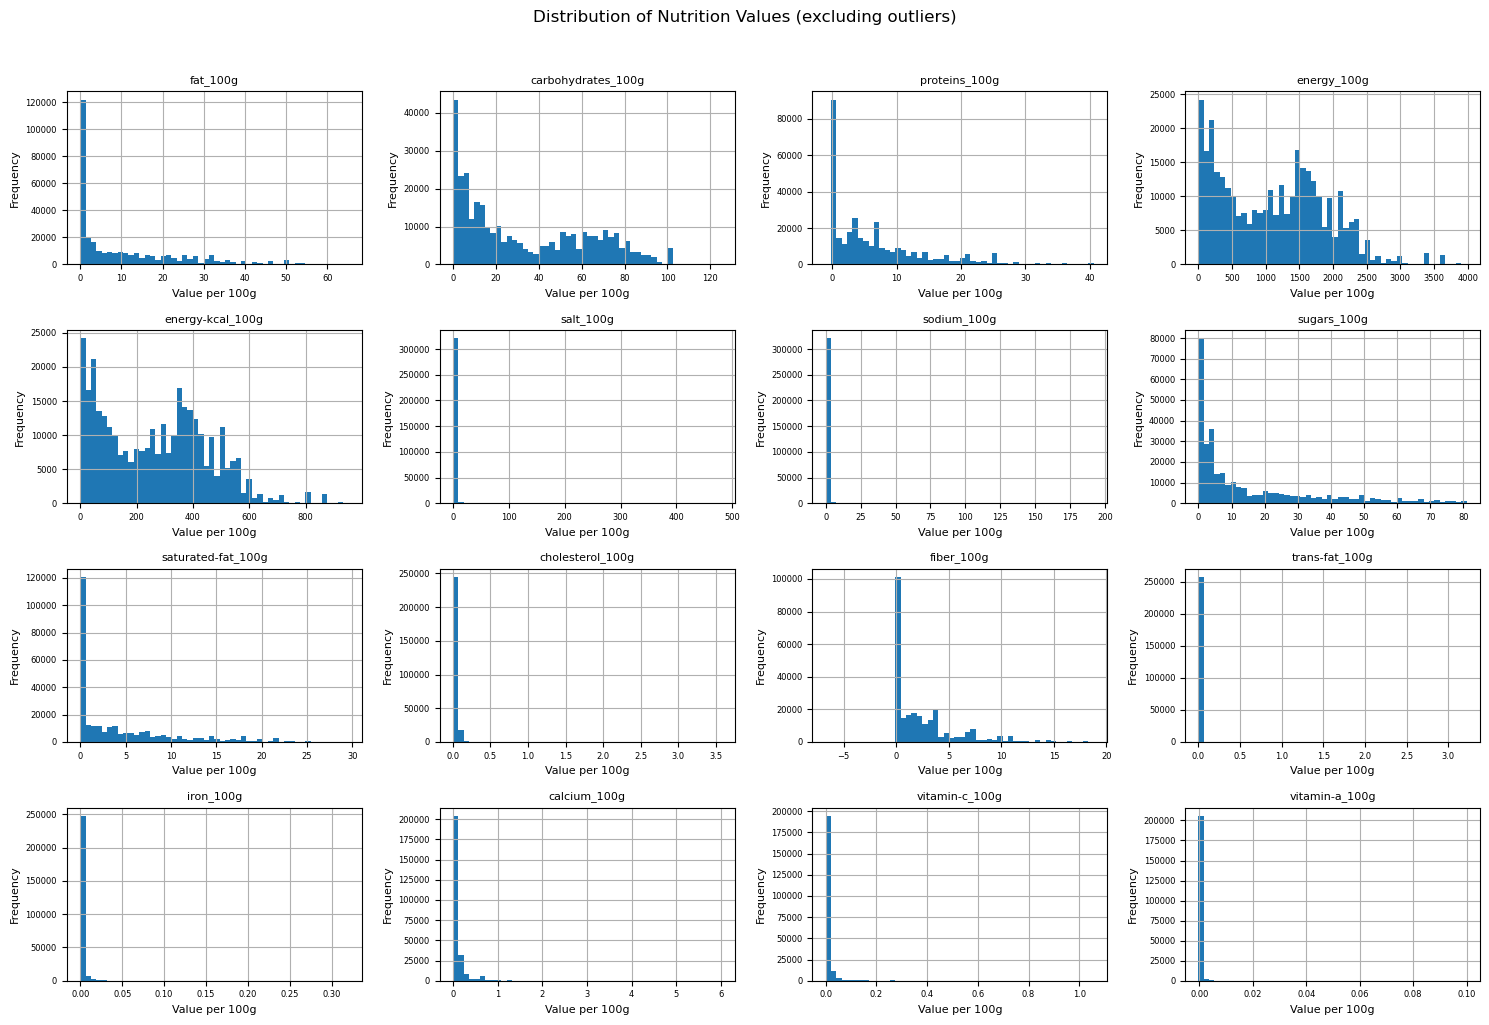

In [27]:
# Create a function to analyze distribution
def analyze_column_distribution(df, column):
    stats_dict = {
        'mean': df[column].mean(),
        'median': df[column].median(),
        'skewness': df[column].skew(),
        'missing_percentage': (df[column].isnull().sum() / len(df) * 100)
    }
    return pd.Series(stats_dict)

# Get nutrition columns (excluding non-numeric columns)
nutrition_cols = [col for col in usable_columns if col != 'nutrition-score-fr_100g']

# Analyze each nutrition column
distribution_analysis = pd.DataFrame({
    col: analyze_column_distribution(cleaned_us_food, col) for col in nutrition_cols
}).round(2)

print("Distribution analysis for each nutrition column:")
print(distribution_analysis)

# Plot histograms for visual analysis
plt.figure(figsize=(15, 10))
plt.suptitle("Distribution of Nutrition Values (excluding outliers)", y=1.02)

for i, col in enumerate(nutrition_cols, 1):
    plt.subplot(4, 4, i)
    # Remove outliers for better visualization (values beyond 3 standard deviations)
    data = cleaned_us_food[col]
    mean = data.mean()
    std = data.std()
    clean_data = data[abs(data - mean) <= 3 * std]
    
    clean_data.hist(bins=50)
    plt.title(col, fontsize=8)
    plt.xlabel("Value per 100g", fontsize=8)
    plt.ylabel("Frequency", fontsize=8)
    plt.tick_params(labelsize=6)

plt.tight_layout()

## Handle missing values

In [28]:
# Set default image URL for missing images
default_image_url = "https://static.wixstatic.com/media/69e890_7ac3191467e244b3845421625a7f9e11~mv2.png/v1/fill/w_319,h_321,al_c,q_85,enc_auto/IMG_1596.png"
cleaned_us_food['image_url'] = cleaned_us_food['image_url'].fillna(default_image_url)

# Fill missing values in nutrition columns with median
for col in nutrition_cols:
    median_value = cleaned_us_food[col].median()
    cleaned_us_food[col] = cleaned_us_food[col].fillna(median_value)
    
# For nutriscore_score, which is categorical, fill with mode (most frequent value)
cleaned_us_food['nutriscore_score'] = cleaned_us_food['nutriscore_score'].fillna(
    cleaned_us_food['nutriscore_score'].mode()[0]
)

# Check remaining missing values
missing_after = cleaned_us_food.isnull().sum()
print("Remaining missing values after filling:")
for col, count in missing_after[missing_after > 0].items():
    print(f"{col}: {count} missing values")

# Display a sample of rows to verify the changes
print("\nSample of cleaned data:")
cleaned_us_food.sample(3)

Remaining missing values after filling:
product_name: 5434 missing values
generic_name: 344819 missing values
brands: 159577 missing values
categories: 56065 missing values
pnns_groups_1: 762 missing values
nutrition-score-fr_100g: 109825 missing values

Sample of cleaned data:


,code,image_url,product_name,generic_name,brands,categories,pnns_groups_1,nutriscore_score,fat_100g,carbohydrates_100g,...,sugars_100g,saturated-fat_100g,cholesterol_100g,fiber_100g,trans-fat_100g,iron_100g,calcium_100g,nutrition-score-fr_100g,vitamin-c_100g,vitamin-a_100g
414038,835144037007,https://static.wixstatic.com/media/69e890_7ac3...,Premium Dried Cranberries,NaN,World Food Products,"Plant-based foods and beverages, Plant-based f...",Fruits and vegetables,4.0,0.00,82.50,...,67.50,0.00,0.000,5.0,0.0,0.00096,0.035,4.0,0.0000,0.000000
225971,78487552732,https://static.wixstatic.com/media/69e890_7ac3...,Baked Potato Stix,NaN,Lucky Foods,Frozen foods,unknown,0.0,5.61,25.23,...,2.80,0.93,0.005,1.9,0.0,0.00135,0.037,0.0,0.0045,0.000084
449359,888109011680,https://static.wixstatic.com/media/69e890_7ac3...,Fudge covered peanut butter cake with peanut b...,NaN,NaN,"Biscuits and cakes, Cakes",Sugary snacks,26.0,21.43,58.33,...,45.24,14.29,0.018,1.2,0.0,0.00167,0.037,26.0,0.0000,0.000000


## Set up MySQL Database

In [29]:
# MySQL connection parameters
db_params = {
    'host': 'localhost',
    'user': 'root',
    'password': '',  # Empty password for XAMPP default setup
    'port': 3306
}

# Create database
try:
    # Connect to MySQL server
    conn = pymysql.connect(**db_params)
    cursor = conn.cursor()
    
    # Create database if it doesn't exist
    cursor.execute("CREATE DATABASE IF NOT EXISTS fooddb")
    print("Database 'fooddb' created successfully!")
    
    # Close the connection
    cursor.close()
    conn.close()
except Exception as e:
    print(f"Error: {e}")

Database 'fooddb' created successfully!


In [30]:
# Create SQLAlchemy engine
engine = create_engine('mysql+pymysql://root:@localhost:3306/fooddb')

try:
    # Insert the DataFrame into MySQL
    cleaned_us_food.to_sql(
        name='foodtbl',
        con=engine,
        if_exists='replace',  # This will drop the table if it exists and create a new one
        index=False,
        chunksize=1000  # Insert in chunks to handle large dataset
    )
    print("Data successfully inserted into foodtbl!")
    
    # Verify the data
    # Get the number of rows in the table
    with engine.connect() as conn:
        result = conn.execute("SELECT COUNT(*) FROM foodtbl")
        row_count = result.fetchone()[0]
        print(f"\nNumber of rows in database: {row_count}")
        
        # Get sample of data
        print("\nSample of data from database:")
        result = conn.execute("SELECT * FROM foodtbl LIMIT 3")
        for row in result:
            print(row)
            
except Exception as e:
    print(f"Error: {e}")
finally:
    engine.dispose()

Data successfully inserted into foodtbl!

Number of rows in database: 349161

Sample of data from database:
('0000000004530', 'https://static.wixstatic.com/media/69e890_7ac3191467e244b3845421625a7f9e11~mv2.png/v1/fill/w_319,h_321,al_c,q_85,enc_auto/IMG_1596.png', 'Banana Chips Sweetened (Whole)', None, None, None, 'unknown', 14.0, 28.57, 64.29, 3.57, 2243.0, 536.0, 0.0, 0.0, 14.29, 28.57, 0.018, 3.6, 0.0, 0.00129, 0.0, None, 0.0214, 0.0)
('0000000004559', 'https://static.wixstatic.com/media/69e890_7ac3191467e244b3845421625a7f9e11~mv2.png/v1/fill/w_319,h_321,al_c,q_85,enc_auto/IMG_1596.png', 'Peanuts', None, 'Torn & Glasser', None, 'unknown', 14.0, 17.86, 60.71, 17.86, 1941.0, 464.0, 0.635, 0.254, 17.86, 0.0, 0.0, 7.1, 0.0, 0.00129, 0.071, None, 0.0, 0.0)
('0000000016087', 'https://static.wixstatic.com/media/69e890_7ac3191467e244b3845421625a7f9e11~mv2.png/v1/fill/w_319,h_321,al_c,q_85,enc_auto/IMG_1596.png', 'Organic Salted Nut Mix', None, 'Grizzlies', None, 'unknown', 14.0, 57.14, 17.8

## Test database queries

In [6]:
# Example queries
query_examples = [
    "SELECT product_name FROM foodtbl limit 30"
]

# Execute queries
engine = create_engine('mysql+pymysql://root:@localhost:3306/fooddb')
lst = []
try:
    with engine.connect() as conn:
        for query in query_examples:
            print(f"\nExecuting query: {query}")
            result = conn.execute(query)
            for row in result:
                lst.append(row)
except Exception as e:
    print(f"Error: {e}")
finally:
    engine.dispose()


Executing query: SELECT product_name FROM foodtbl limit 30


In [ ]:
lst.strip()

[('Banana Chips Sweetened (Whole)',),
 ('Peanuts',),
 ('Organic Salted Nut Mix',),
 ('Organic Polenta',),
 ('Breadshop Honey Gone Nuts Granola',),
 ('Organic Long Grain White Rice',),
 ('Organic Muesli',),
 ('Organic Dark Chocolate Minis',),
 ('Organic Sunflower Oil',),
 ('Organic Adzuki Beans',),
 ('Organic Penne Pasta',),
 ('Zen Party Mix',),
 ('Organic Golden Flax Seeds',),
 ('Organic Spicy Punks',),
 ('Cinnamon Nut Granola',),
 ('Organic Hazelnuts',),
 ('Organic Sweetened Banana Chips',),
 ('Lotus Organic Brown Jasmine Rice',),
 ('Organic Oat Groats',),
 ('Energy Power Mix',),
 ('Antioxidant Mix - Berries & Chocolate',),
 ('Organic Quinoa Coconut Granola With Mango',),
 ('Fire Roasted Hatch Green Chile Almonds',),
 ('Peanut Butter Power Chews',),
 ('Real Salt Granular',),
 ('Organic Unswt Berry Coconut Granola',),
 ('Roasted Salted Black Pepper Cashews',),
 ('Thai Curry Roasted Cashews',),
 ('Wasabi Tamari Almonds',),
 ('Organic Medium Shredded Coconut',)]